In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt  # install dependencies

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.7.0+cu101 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15079MB, multi_processor_count=40)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
from IPython.display import Image, clear_output  # to display images

# 3. Train

Download [COCO128](https://www.kaggle.com/ultralytics/coco128), a small 128-image tutorial dataset, start tensorboard and train YOLOv5s from a pretrained checkpoint for 3 epochs (note actual training is typically much longer, around **300-1000 epochs**, depending on your dataset).

In [ ]:
# Weights & Biases (optional)
%pip install -q wandb  
!wandb login  # use 'wandb disabled' or 'wandb enabled' to disable or enable

     |████████████████████████████████| 1.8MB 8.6MB/s 
     |████████████████████████████████| 81kB 10.2MB/s 
     |████████████████████████████████| 133kB 21.9MB/s 
     |████████████████████████████████| 102kB 8.3MB/s 
     |████████████████████████████████| 163kB 25.1MB/s 
     |████████████████████████████████| 71kB 9.8MB/s 
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
!python train.py --img 512 --batch 16 --epochs 300 --data /content/yolov5/data/voc.yaml --cfg yolov5l.yaml --nosave --cache --adam

Using torch 1.7.0+cu101 CUDA:0 (Tesla T4, 15079.75MB)

Namespace(adam=True, batch_size=16, bucket='', cache_images=True, cfg='./models/yolov5l.yaml', data='/content/yolov5/data/voc.yaml', device='', epochs=300, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[512, 512], local_rank=-1, log_artifacts=False, log_imgs=16, multi_scale=False, name='exp', noautoanchor=False, nosave=True, notest=False, project='runs/train', rect=False, resume=False, save_dir='runs/train/exp5', single_cls=False, sync_bn=False, total_batch_size=16, weights='yolov5s.pt', workers=8, world_size=1)
Start Tensorboard with "tensorboard --logdir runs/train", view at http://localhost:6006/
2020-12-31 03:24:41.522100: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
Hyperparameters {'lr0': 0.01, 'lrf': 0.2, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'w

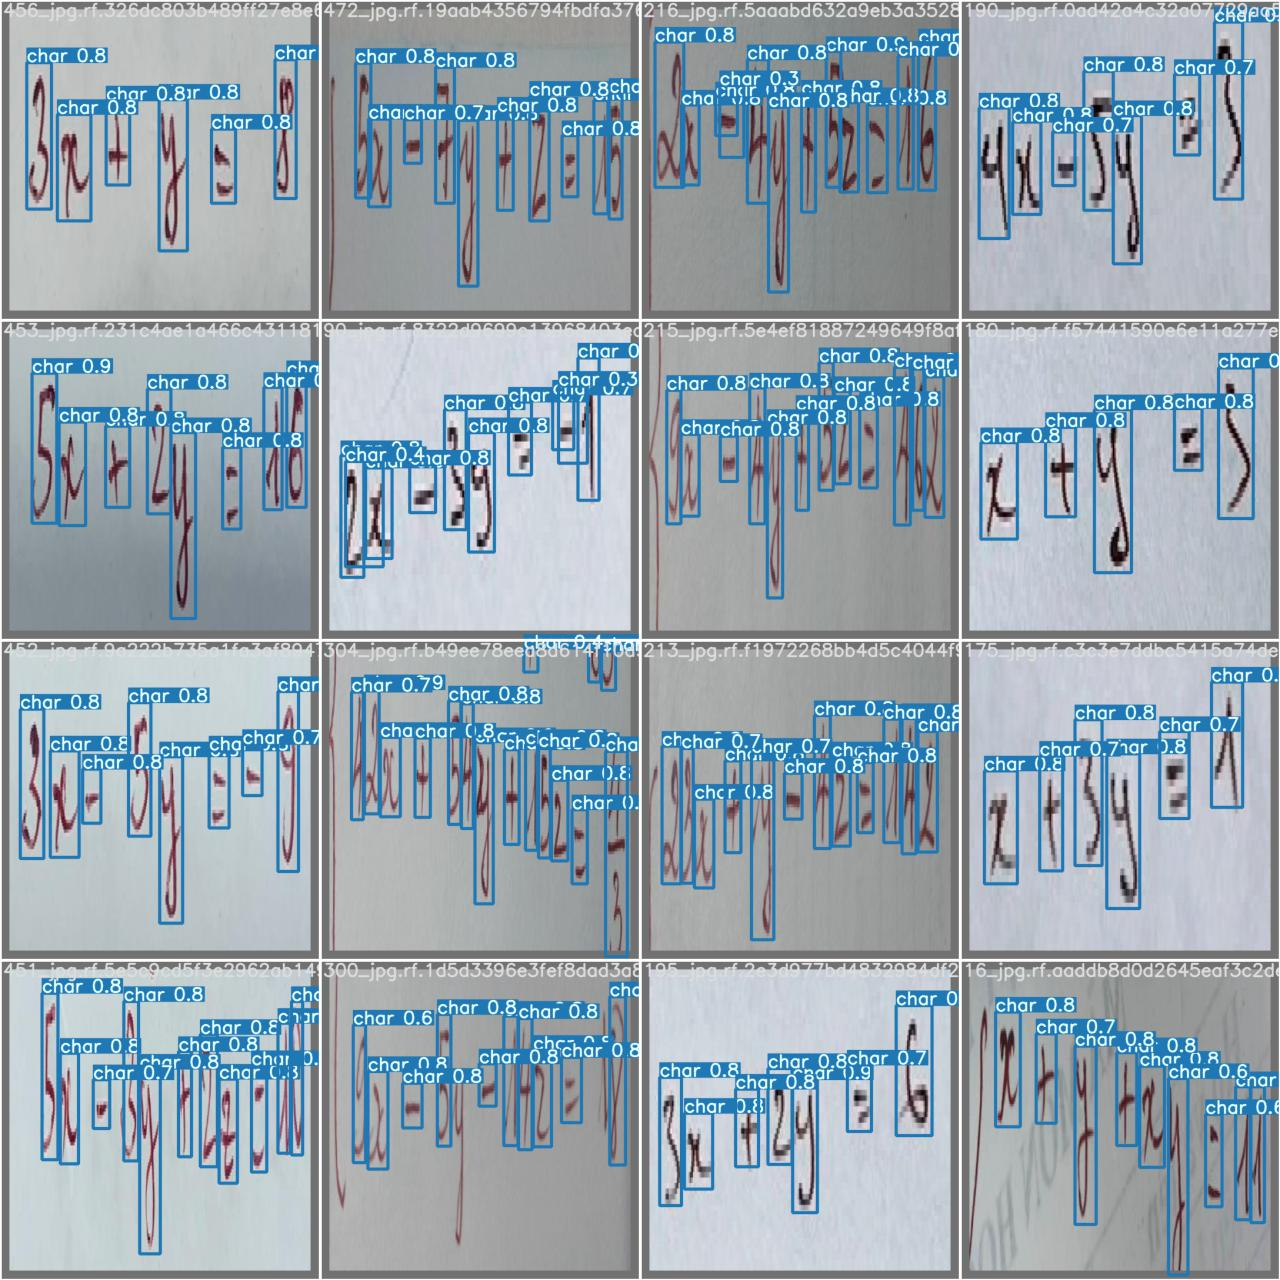

In [ ]:
Image(filename='/content/yolov5/runs/train/exp5/test_batch2_pred.jpg', width=900)

In [ ]:
from utils.plots import plot_results 
plot_results(save_dir='/content/yolov5/runs/train/exp')  # plot all results*.txt as results.png
Image(filename='/content/yolov5/runs/train/exp5/results.png', width=800)

AssertionError: ignored

In [ ]:
!python detect.py --source /content/drive/MyDrive/CV_Final_Project/single_eq/GENERATED_YOLO_FORMAT/valid/images/16_jpg.rf.aaddb8d0d2645eaf3c2de9c6a5778e0e.jpg --weights /content/drive/MyDrive/CV_Final_Project/character_detection_weights.pt --conf 0.5

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='/content/drive/MyDrive/CV_Final_Project/single_eq/GENERATED_YOLO_FORMAT/valid/images/16_jpg.rf.aaddb8d0d2645eaf3c2de9c6a5778e0e.jpg', update=False, view_img=False, weights=['/content/drive/MyDrive/CV_Final_Project/character_detection_weights.pt'])
Using torch 1.7.0+cu101 CUDA:0 (Tesla T4, 15079.75MB)

Fusing layers... 
Model Summary: 400 layers, 47364662 parameters, 0 gradients, 115.8 GFLOPS
image 1/1 /content/drive/MyDrive/CV_Final_Project/single_eq/GENERATED_YOLO_FORMAT/valid/images/16_jpg.rf.aaddb8d0d2645eaf3c2de9c6a5778e0e.jpg: 640x640 7 chars, Done. (0.035s)
Results saved to runs/detect/exp4
Done. (0.082s)


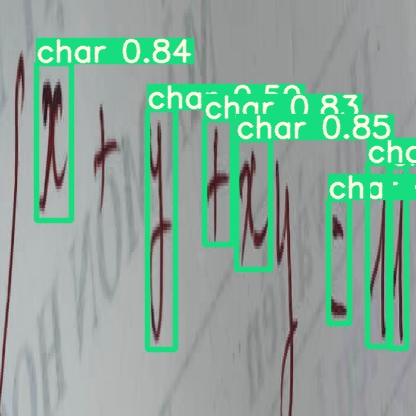

In [ ]:
Image(filename='/content/yolov5/runs/detect/exp4/16_jpg.rf.aaddb8d0d2645eaf3c2de9c6a5778e0e.jpg')